# Exploratory Data Analysis

In [ ]:
# Tasks:

# Loading the Dataset
# performing Statistical summariesabs
# Visualizing data Distributions and Relationships

### Importing Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the Dataset

In [4]:
# renaming Credit_card_dataset as ccd

ccd = pd.read_csv(r"C:\Creditcardproject\data\Rawcreditcarddata.csv")

# Displaying all columns of the dataset

pd.pandas.set_option('display.max_columns',None)

# Displaying all Rows of the dataset for loading issue its been commented out

#pd.pandas.set_option('display.max_rows',None)

ccd.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0


### Overview of a dataset

In [5]:
# The Shape attribute shows the number of Rows and columns in a dataset

ccd.shape

(284807, 31)

In [6]:
# Info attribute shows the not null values and their datatypes
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Descriptive Statistics

In [7]:
# Number of Fraud and Non Fraud Transactions where 0 are Normal transactions and 1 are Fraudulant Transactions

ccd['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
# Amount column in our dataset shows the amount of a particular transaction.

ccd[['Amount']].describe()

,Amount
count,284807.000000
mean,88.349619
std,250.120109
min,0.000000
25%,5.600000
50%,22.000000
75%,77.165000
max,25691.160000


### Visual representation of Fraudulant and Legitimate transactions¶

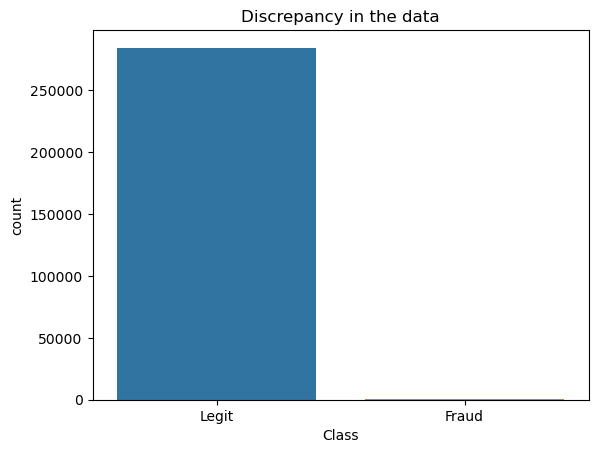

In [9]:
sns.countplot(data = ccd, x = 'Class')
plt.xticks(ticks=range(2), labels=['Legit','Fraud'])
plt.title('Discrepancy in the data')
plt.show()

#### With the above representation of fraudulant and legitamate transactions we can say that its a highly Imbalanced Dataset which needs to be treated, otherwise our model will fail to predict the fraudulant transactions.

In [10]:
Fraud = ccd[ccd['Class']==1]
Legit = ccd[ccd['Class']==0]

In [11]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
Legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

#### Checking the Discriptive statistics for Fradulant and Legitimate Transactions

## Distribution of numeric variables with distplot


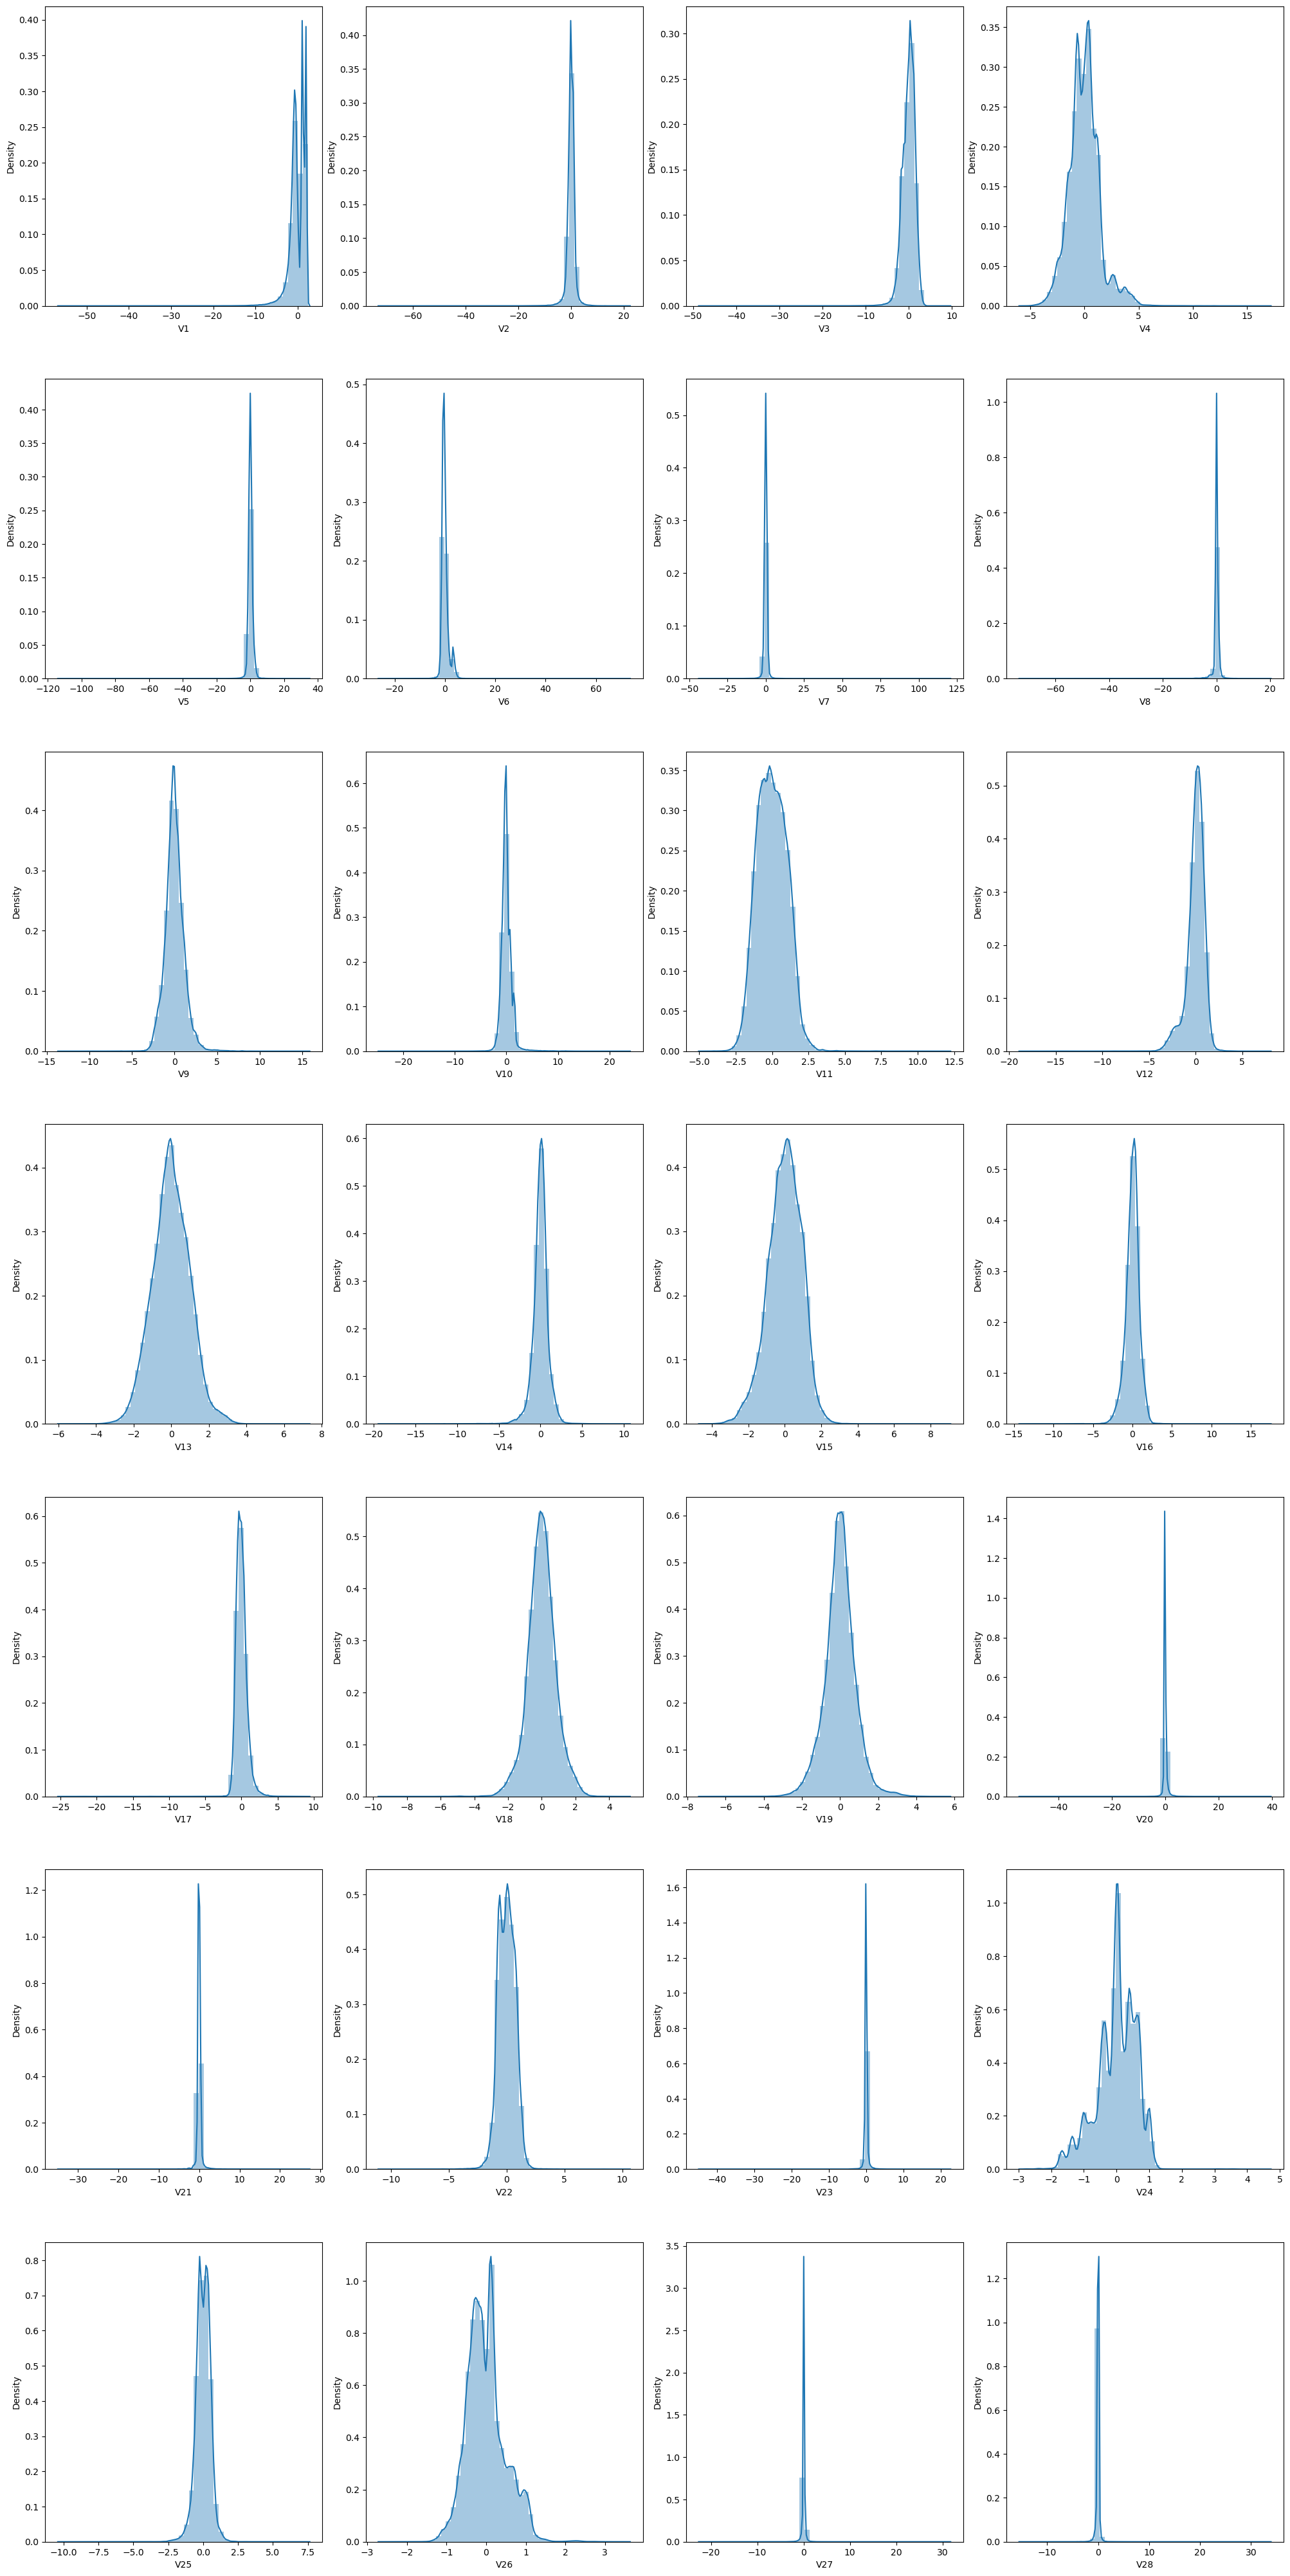

In [13]:
# Finding the distribution of numeric variables

ccd_temp = ccd.drop(columns=['Time','Amount','Class'],axis=1)

fig,ax = plt.subplots(ncols=4, nrows=7, figsize=(20,40))
index = 0
ax = ax.flatten()

for col in ccd_temp.columns:
    sns.distplot(ccd_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad=0.5, h_pad=5)

#### The Distribution of a dataset provides us with information on how spread out our data values are and to check if the data is skewed or not, which can help make informed decisions. In the above distribution most of the numerical features are showing Gaussian Distribution which means they are evenly spread out and won't impact our model peformance.¶

## Correlation Matrix

<Axes: >

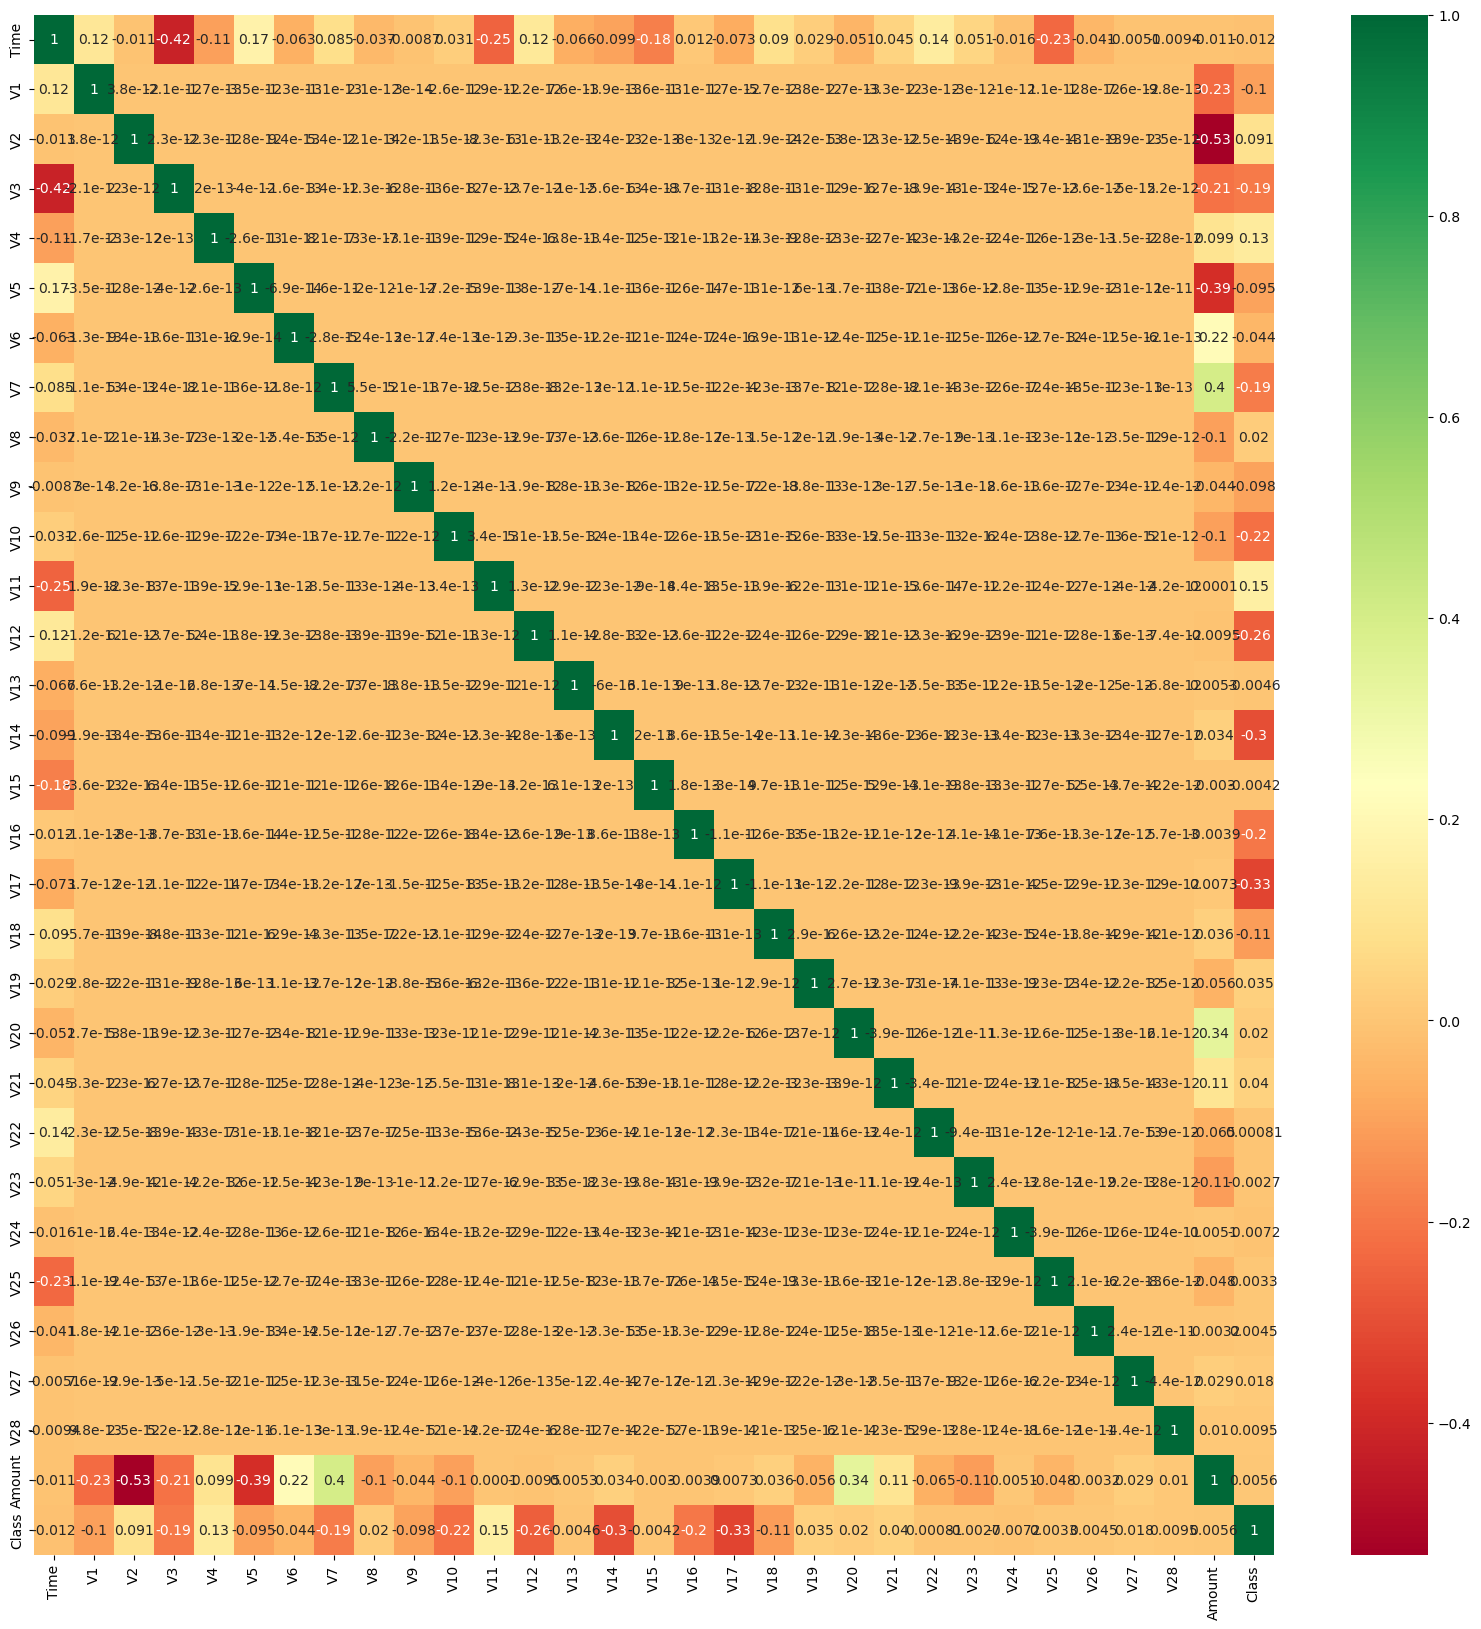

In [14]:
corr = ccd.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap= "RdYlGn" )

#### From this Correlation Matrix there isn't much to gather but we can see there is some relation between features and traget variable(class) but its neither a positive strong relationship nor it has a neative strong relationship.

### *** After EDA the next process is Data Preprocessing *** 